<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# **Universidad San Sebastián - Magister Data Science**

### Mauricio Pérez
### Pablo Loaiza


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_excel("../data/raw/cancer_hbv.xlsx", engine='openpyxl')



### Descripcion datafile

In [3]:
from tabulate import tabulate

# Print the transposed describe() dataframe using tabulate
print(tabulate(df.describe().T, headers='keys', tablefmt='grid'))


+--------------------------+---------+-------------+-------------+-------+-------+-------+-------+-------+
|                          |   count |        mean |         std |   min |   25% |   50% |   75% |   max |
+==========================+=========+=============+=============+=======+=======+=======+=======+=======+
| IDPACIENTE               |   23553 | 16467.2     | 8688.26     |     9 |  9583 | 16006 | 23175 | 38148 |
+--------------------------+---------+-------------+-------------+-------+-------+-------+-------+-------+
| IDTUMOR                  |   23553 | 15337.1     | 7847.52     |     7 |  8979 | 15459 | 21795 | 34137 |
+--------------------------+---------+-------------+-------------+-------+-------+-------+-------+-------+
| COD_RELIGION             |   23522 |    10.9412  |    2.58347  |     0 |    12 |    12 |    12 |    12 |
+--------------------------+---------+-------------+-------------+-------+-------+-------+-------+-------+
| COD_ETNIA                |   23525 

In [4]:
# Listamos todas las columnas
print("\nLista de columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(columna)


Lista de columnas:
IDPACIENTE
IDTUMOR
SEXO
FEC_NACIMIENTO
EDAD
PREVISION
COD_RELIGION
RELIGION1
COD_ETNIA
ETNIA
ETNIA_APELLIDO
DIRECCION
NUM_DOMICILIO
DEPTO_DOMICILIO
LOCALIDAD_DOMICILIO
COD_ZONA
ZONA_VIVIENDA
COD_COMUNA
COMUNA
COD_REGION
REGION
COD_SSREFERENCIA
SSREFERENCIA
COD_RECINTO_PROCEDE
RECINTO_PROCEDE
COD_ESTABLE_DESTINO
ESTABLE_DESTINO
COD_ACT_LABORAL
ACT_LABORAL
COD_ACT_EMPRESA
ACT_EMPRESA
COD_SIT_LABORAL
SITUACION_LABORAL
ANHOSESTUDIO
COD_ULT_CURSO
ULT_CURSO_APROBADO
CANCER_PREVIO1
FECHA1
CANCER_PREVIO2
FECHA2
PARENTESCO1
CANCER_PARENTESCO1
PARENTESCO2
CANCER_PARENTESCO2
PARENTESCO3
CANCER_PARENTESCO3
ID_COMITE
DESCRIPCION_COMITE
FECHA_COMITE
FEC_INGRESO_CASO
FEC_DIAGNO
INTERVALO_INGRESO_DIAGNO
FEC_TOM_MUESTRA
TIPO_TUMOR
COD_TOPOLOGIA
NOM_TOPOLOGIA
COD_DET_TOPOLOGIA
NOM_DETALLE_TOPO
COD_CIE10
COD_MORFO
MORFO_COMPLETA
COD_COMPORTAMIENTO
NOM_COMPORTAMIENTO
COD_EXTENSION
EXTENSION_NOM
COD_LATERALIDAD
LATERALIDAD_NOM
COD_GRADO
GRADO_DIFERENCIACION
COD_BASE
BASE_DIAGNOSTICA
TUM

In [5]:
columnas_a_eliminar = [
    'IDPACIENTE',
    'IDTUMOR',
    'SEXO',
    'PREVISION',
    'COD_RELIGION',
    'COD_ETNIA',
    'EDAD',
    'ETNIA_APELLIDO',
    'DIRECCION',
    'NUM_DOMICILIO',
    'DEPTO_DOMICILIO',
    'LOCALIDAD_DOMICILIO',
    'COD_ZONA',
    'COD_COMUNA',
    'COD_REGION',
    'COD_SSREFERENCIA',
    'COD_RECINTO_PROCEDE',
    'COD_ESTABLE_DESTINO',
    'COD_ACT_LABORAL',
    'COD_ACT_EMPRESA',
    'COD_SIT_LABORAL',
    'ANHOSESTUDIO',
    'COD_ULT_CURSO',
    'ID_COMITE',
    'DESCRIPCION_COMITE',
    'COD_MORFO',
    'COD_COMPORTAMIENTO',
    'COD_EXTENSION',
    'COD_LATERALIDAD',
    'COD_GRADO',
    'COD_BASE',
    'INTERVALO_INGRESO_DIAGNO',
    'OBSERVACIONES',
    'ESTADO_RECH'
]

#  Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

print(tabulate(df.head(), headers='keys', tablefmt='grid'))


+----+------------------+-------------+----------------------+-----------------+----------+--------------------+----------------+--------------------------------------------------------------------+--------------------------------------+--------------------------------------+-----------------+---------------------+----------------------+------------------+------------+-----------------------+------------+---------------+----------------------+---------------+----------------------+---------------+----------------------+----------------+--------------------+--------------+-------------------+--------------+-----------------+---------------------+---------------------+--------------------------------------------+-------------+------------------------------------------------------+----------------------+-----------------+-------------------+----------------------------+------------------------------+----------+----------------+----------------+------------+--------+--------------+--------

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23553 entries, 0 to 23552
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FEC_NACIMIENTO        23553 non-null  object
 1   RELIGION1             23495 non-null  object
 2   ETNIA                 23525 non-null  object
 3   ZONA_VIVIENDA         23460 non-null  object
 4   COMUNA                23552 non-null  object
 5   REGION                23553 non-null  object
 6   SSREFERENCIA          23532 non-null  object
 7   RECINTO_PROCEDE       23511 non-null  object
 8   ESTABLE_DESTINO       22037 non-null  object
 9   ACT_LABORAL           23530 non-null  object
 10  ACT_EMPRESA           23522 non-null  object
 11  SITUACION_LABORAL     23451 non-null  object
 12  ULT_CURSO_APROBADO    23465 non-null  object
 13  CANCER_PREVIO1        23456 non-null  object
 14  FECHA1                778 non-null    object
 15  CANCER_PREVIO2        22066 non-null

### Filtrar Casos Cancer Prostata

In [7]:
# Filtrar el dataset por la columna 'NOM_TOPOLOGIA' donde el valor sea 'Prostata'
df = df[df['NOM_TOPOLOGIA'] == 'Prostata']

In [8]:
# Guardar el DataFrame filtrado especificando el delimitador, sin índice y con codificación UTF-8
df.to_csv('../data/processed/df_cancer_prostata.csv', index=False, encoding='utf-8')

## Graficos

### Cantidad Casos por Etapa Clinica

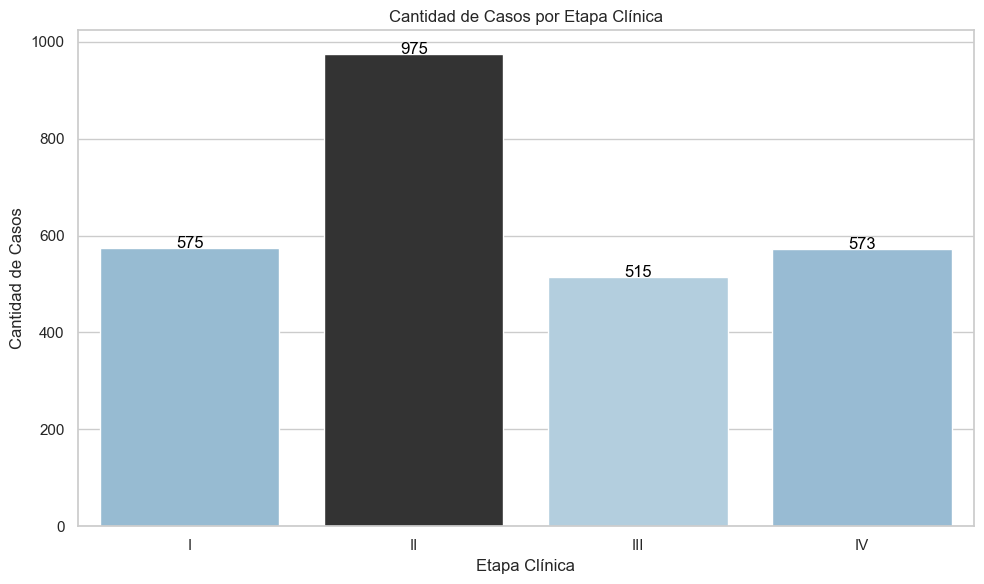

In [9]:
import seaborn as sns
# Import seaborn and matplotlib for plotting
import matplotlib.pyplot as plt



# Filter the data to exclude NaN and 0 values in 'ETAPA_CLINICA'
df_filtered = df[df['ETAPA_CLINICA'].notna() & (df['ETAPA_CLINICA'] != '0')]

# Count the number of cases for each 'ETAPA_CLINICA'
etapa_counts = df_filtered['ETAPA_CLINICA'].value_counts().sort_index()

casos_por_etapa = df_filtered.groupby('ETAPA_CLINICA').size().reset_index(name='Casos')

# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))

bar_plot= sns.barplot(x='ETAPA_CLINICA', y='Casos',palette='Blues_d', hue='Casos', data=casos_por_etapa, legend=False)



# Add total labels on top of each bar
for index, row in casos_por_etapa.iterrows():
    bar_plot.text(row.name, row.Casos, int(row.Casos), color='black', ha="center")

# Add labels and title
plt.xlabel('Etapa Clínica')
plt.ylabel('Cantidad de Casos')
plt.title('Cantidad de Casos por Etapa Clínica')

# Show the plot
plt.tight_layout()
plt.show()



### Distribución por Edad

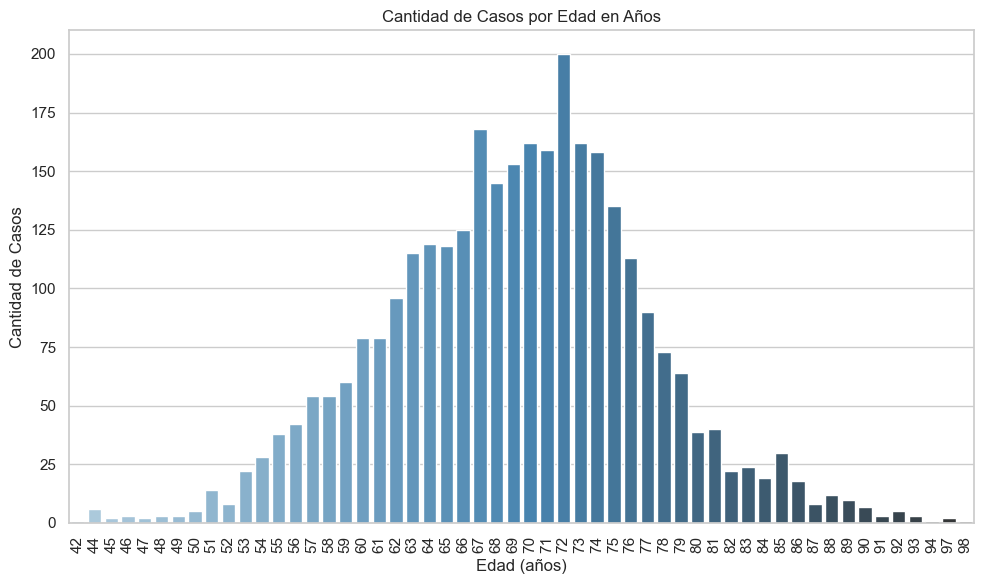

In [10]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['FEC_NACIMIENTO'] = pd.to_datetime(df['FEC_NACIMIENTO'], format='%d-%m-%Y',errors='coerce')
df['FEC_DIAGNO'] = pd.to_datetime(df['FEC_DIAGNO'],format='%d-%m-%Y')

df['EDAD'] = df['FEC_DIAGNO'].dt.year - df['FEC_NACIMIENTO'].dt.year



# Filtrar las filas con valores NaN en 'EDAD_AÑOS'
df_age_filtered = df.dropna(subset=['EDAD'])
df_age_filtered['EDAD'] = df_age_filtered['EDAD'].astype(int)

# Crear un gráfico de barras de la cantidad de casos por edad
plt.figure(figsize=(10, 6))
sns.countplot(x='EDAD', data=df_age_filtered, palette='Blues_d', hue='EDAD',legend=False)

# Añadir etiquetas y título
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad de Casos')
plt.title('Cantidad de Casos por Edad en Años')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Distribución por Region

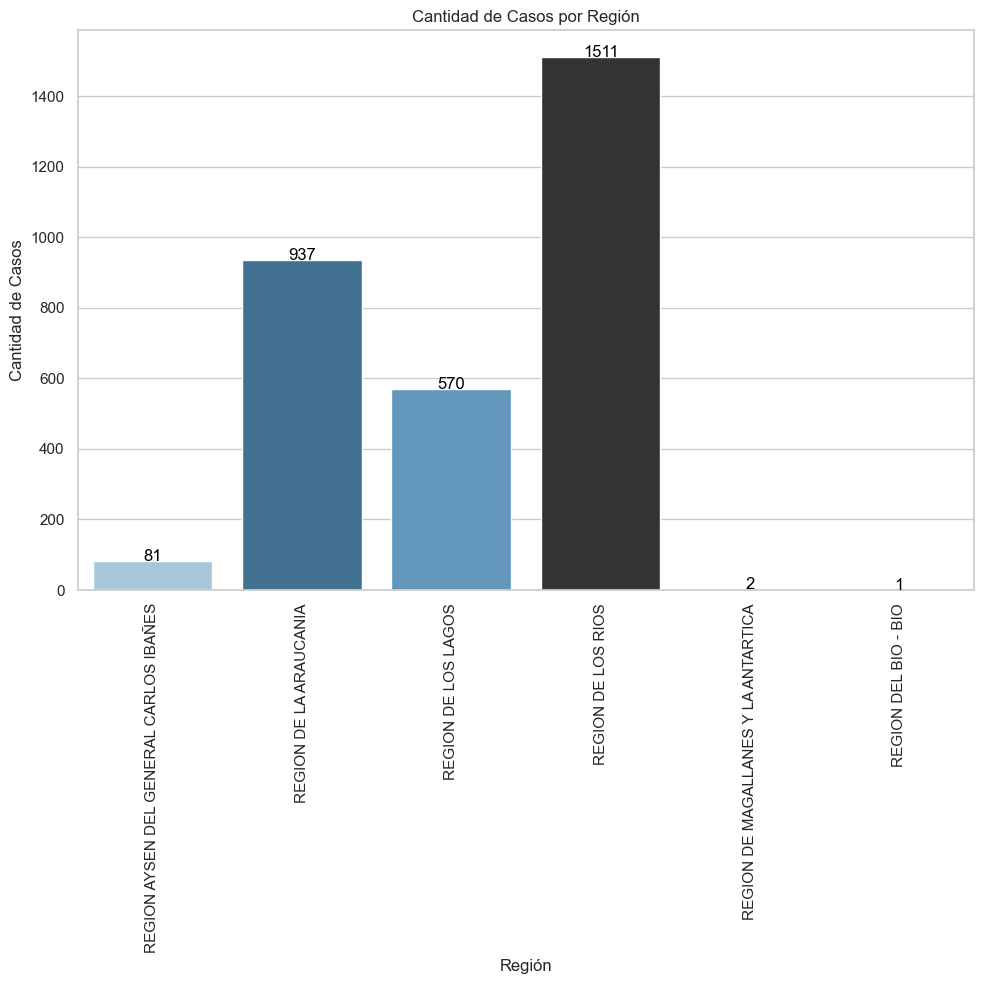

In [11]:

# Filter the data to exclude NaN and 0 values in 'ETAPA_CLINICA'
df_filtered = df[df['REGION'].notna()]

casos_por_region = df_filtered.groupby('REGION').size().reset_index(name='Casos')

# Set the style for the seaborn plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 10))

bar_plot= sns.barplot(x='REGION', y='Casos',palette='Blues_d', hue='Casos', data=casos_por_region, legend=False)


# Add total labels on top of each bar
for index, row in casos_por_region.iterrows():
    bar_plot.text(row.name, row.Casos, int(row.Casos), color='black', ha="center")

# Add labels and title
plt.xlabel('Región')
plt.ylabel('Cantidad de Casos')
plt.title('Cantidad de Casos por Región')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


### Cantidad de Casos por Año

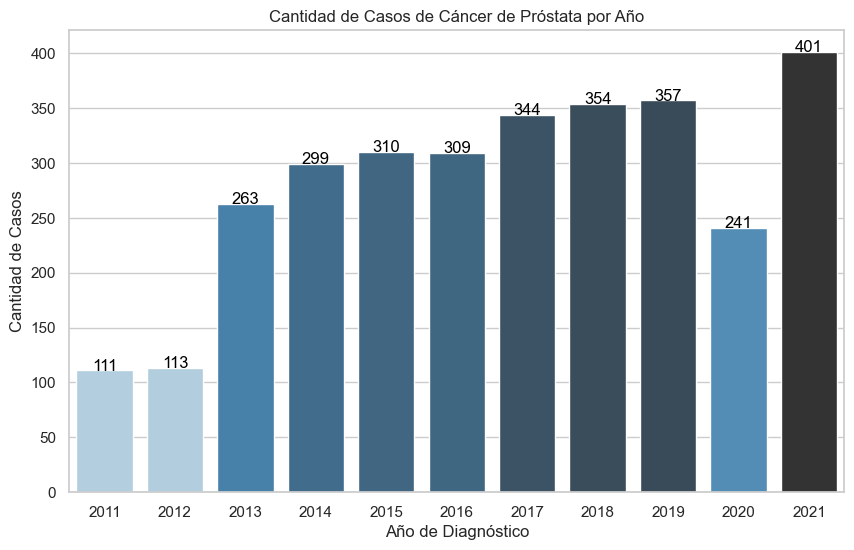

In [12]:

import seaborn as sns

# Convert the diagnosis date column to datetime
df['FEC_DIAGNO'] = pd.to_datetime(df['FEC_DIAGNO'], errors='coerce')

# Extract year from the diagnosis date
df['Year_Diagno'] = df['FEC_DIAGNO'].dt.year.astype('Int64')

# Group by year and count the number of cases
cases_per_year = df.groupby('Year_Diagno').size().reset_index(name='Total_Casos')


# Set the style for the seaborn plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year_Diagno', y='Total_Casos', data=cases_per_year, palette='Blues_d', hue='Total_Casos',legend=False)

# Add total labels on top of each bar
for index, row in cases_per_year.iterrows():
    bar_plot.text(row.name, row.Total_Casos, int(row.Total_Casos), color='black', ha="center")

plt.xlabel('Año de Diagnóstico')
plt.ylabel('Cantidad de Casos')
plt.title('Cantidad de Casos de Cáncer de Próstata por Año')

plt.show()


### Cantidad de Casos por Tipo de Terapia



In [13]:
# Eliminar el primer carácter '|' de cada valor en la columna TIPOTERAPIA
df['TIPOTERAPIA'] = df['TIPOTERAPIA'].str.lstrip('|')
# Aplicar el split y rellenar las partes faltantes con None
split_cols = df['TIPOTERAPIA'].str.split('\|', expand=True).reindex(columns=range(5), fill_value=None)
split_cols.columns = ['TIPO_TERAPIA_1', 'TIPO_TERAPIA_2', 'TIPO_TERAPIA_3', 'TIPO_TERAPIA_4', 'TIPO_TERAPIA_5']

# Asignar las nuevas columnas al DataFrame original
df = df.join(split_cols)


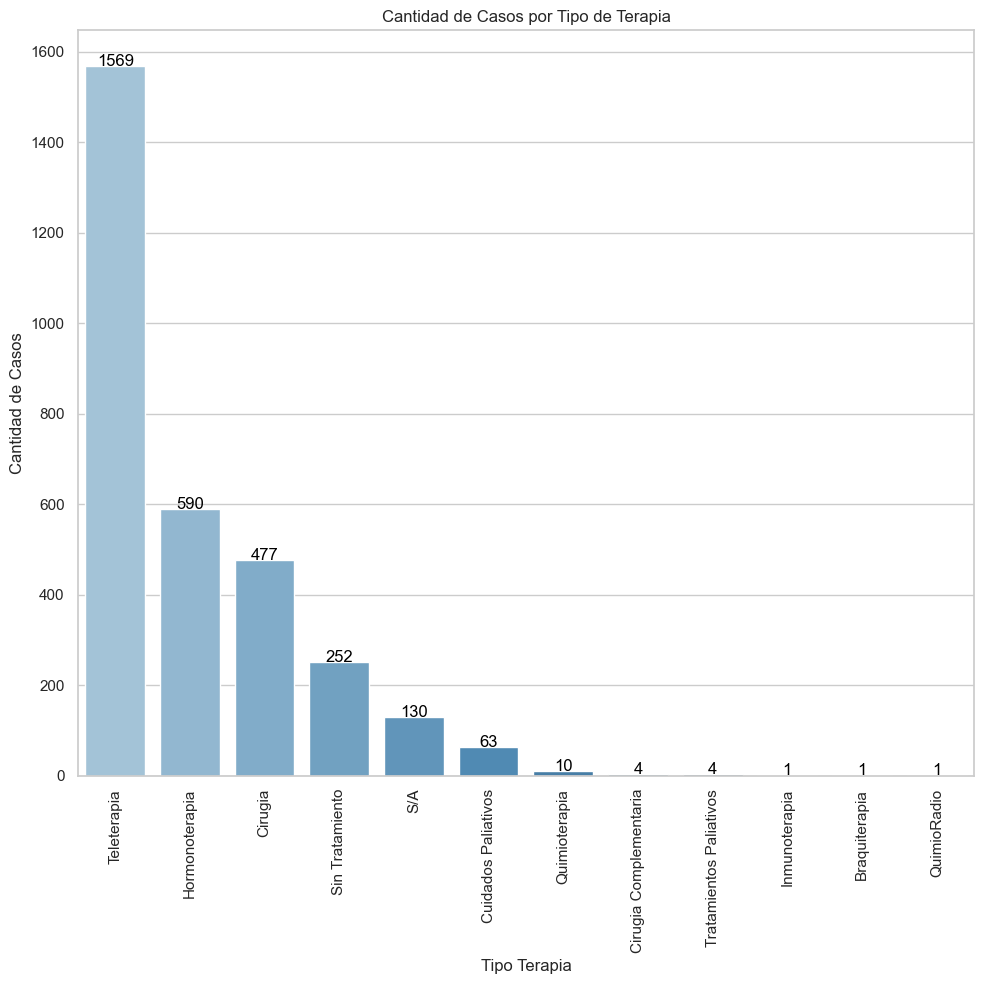

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar los datos para excluir valores NaN en 'TIPO_TERAPIA_1'
df_filtered = df.dropna(subset=['TIPO_TERAPIA_1'])

# Contar el número de casos por cada 'TIPO_TERAPIA_1'
casos_por_terapia = df_filtered['TIPO_TERAPIA_1'].value_counts().reset_index()
casos_por_terapia.columns = ['TIPO_TERAPIA_1', 'Casos']

# Ordenar los datos por 'Casos' en orden descendente
casos_por_terapia = casos_por_terapia.sort_values(by='Casos', ascending=False)

# Configurar el estilo para el gráfico de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='TIPO_TERAPIA_1', y='Casos', palette='Blues_d', data=casos_por_terapia, hue='TIPO_TERAPIA_1',legend=False)

# Añadir etiquetas con el total encima de cada barra
for index, row in casos_por_terapia.iterrows():
    bar_plot.text(index, row.Casos, int(row.Casos), color='black', ha="center")

# Añadir etiquetas y título
plt.xlabel('Tipo Terapia')
plt.ylabel('Cantidad de Casos')
plt.title('Cantidad de Casos por Tipo de Terapia')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Pre-Procesamiento

### Pre-Procesamiento de Caracteristicas 'FECHAINICIO','TNM','TIPO','FECHATERMINO','TIPOTERAPIA'

In [15]:
# Eliminar el primer carácter '|' de cada valor en la columna FECHAINICIO
df['FECHAINICIO'] = df['FECHAINICIO'].str.lstrip('|')
# Reemplazar 'S/A' por NaN
df['FECHAINICIO'] = df['FECHAINICIO'].replace('S/A', np.nan)
# Aplicar el split y rellenar las partes faltantes con None
split_cols = df['FECHAINICIO'].str.split('\|', expand=True).reindex(columns=range(10), fill_value=None)
split_cols.columns = ['FECHA_INICIO_1', 'FECHA_INICIO_2', 'FECHA_INICIO_3', 'FECHA_INICIO_4', 'FECHA_INICIO_5','FECHA_INICIO_6','FECHA_INICIO_7','FECHA_INICIO_8','FECHA_INICIO_9','FECHA_INICIO_10']
# Asignar las nuevas columnas al DataFrame original
df = df.join(split_cols)


In [16]:
# Eliminar el primer carácter '|' de cada valor en la columna FECHAINICIO
df['FECHATERMINO'] = df['FECHATERMINO'].str.lstrip('|')
# Reemplazar 'S/A' por NaN
df['FECHATERMINO'] = df['FECHATERMINO'].replace('S/A', np.nan)
# Aplicar el split y rellenar las partes faltantes con None
split_cols = df['FECHATERMINO'].str.split('\|', expand=True).reindex(columns=range(10), fill_value=None)
split_cols.columns = ['FECHA_TERMINO_1', 'FECHA_TERMINO_2', 'FECHA_TERMINO_3', 'FECHA_TERMINO_4', 'FECHA_TERMINO_5','FECHA_TERMINO_6','FECHA_TERMINO_7','FECHA_TERMINO_8','FECHA_TERMINO_9','FECHA_TERMINO_10']
# Asignar las nuevas columnas al DataFrame original
df = df.join(split_cols)


In [17]:
# Eliminar el primer carácter '|' de cada valor en la columna TIPO
df['TIPO'] = df['TIPO'].str.lstrip('|')
# Reemplazar 'S/A' por NaN
df['TIPO'] = df['TIPO'].replace('S/A', np.nan)
# Aplicar el split y rellenar las partes faltantes con None
split_cols = df['TIPO'].str.split('\|', expand=True).reindex(columns=range(5), fill_value=None)
split_cols.columns = ['TIPO_TRATAMIENTO_1', 'TIPO_TRATAMIENTO_2', 'TIPO_TRATAMIENTO_3', 'TIPO_TRATAMIENTO_4', 'TIPO_TRATAMIENTO_5']
# Asignar las nuevas columnas al DataFrame original
df = df.join(split_cols)


In [18]:
#df[['Tipo_Tumor', 'T', 'N', 'M']] = df['TNM'].str.split(' ', expand=True)
# Eliminar el primer carácter '|' de cada valor en la columna TIPO
df['TNM'] = df['TNM'].str.lstrip('|')
split_cols = df['TNM'].str.split(' ', expand=True).reindex(columns=range(4), fill_value=None)
split_cols.columns = ['Tipo_Tumor', 'T', 'N', 'M']
# Asignar las nuevas columnas al DataFrame original
df = df.join(split_cols)

In [19]:
# Eliminar la columna original
df = df.drop(columns=['FECHAINICIO','TNM','TIPO','FECHATERMINO','TIPOTERAPIA'])
print(tabulate(df.head(10), headers='keys', tablefmt='grid'))


+----+---------------------+-------------+----------------------+-----------------+--------------+---------------------+----------------+-------------------------------------------------+--------------------------------------+-------------------------------------+-----------------+---------------------+------------------------------+------------------+----------+------------------+----------+---------------+----------------------+---------------+----------------------+---------------+----------------------+----------------+--------------------+---------------------+-------------------+--------------+-----------------+-----------------+---------------------+---------------------+-------------+-------------------------------+----------------------+-----------------+-------------------+----------------------------+------------------------------+----------+----------------+----------------+-----------+--------+--------------+-----------------+---------------+-----------+-------------------

In [20]:
# Renombrar la columnas
df = df.rename(columns={'CAUSAFALLECIMIENTO': 'CAUSA_FALLECIMIENTO',
    'CLASEDECASO': 'CLASE_DE_CASO',
    'CANCER_PREVIO1': 'CANCER_PREVIO_1',
    'FECHA1': 'CANCER_PREVIO_FECHA_1',
    'CANCER_PREVIO2': 'CANCER_PREVIO_2',
    'FECHA2': 'CANCER_PREVIO_FECHA_2',
    'PARENTESCO1': 'PARENTESCO_1',
    'CANCER_PARENTESCO1': 'CANCER_PARENTESCO_1',
    'PARENTESCO2': 'PARENTESCO_2',
    'CANCER_PARENTESCO2': 'CANCER_PARENTESCO_2',
    'PARENTESCO3': 'PARENTESCO_3',
    'CANCER_PARENTESCO3': 'CANCER_PARENTESCO_3',
    'FUENTE1': 'FUENTE_1',
    'FUENTE2': 'FUENTE_2',
    'FUENTE3': 'FUENTE_3',
    })

In [21]:
# Guardar el DataFrame filtrado especificando el delimitador, sin índice y con codificación UTF-8
df.to_csv('../data/processed/df_cancer_prostata.csv', index=False, encoding='utf-8')

### Limpieza del dataset

In [22]:
# Calcular nuevamente el porcentaje de valores faltantes en las columnas restantes
missing_data_updated = df.isnull().mean() * 100

# Filtrar y mostrar columnas con valores faltantes, ordenados
missing_data_filtered = missing_data_updated[missing_data_updated > 0].sort_values(ascending=False)

print(tabulate(missing_data_filtered.to_frame(), headers=['Columna', 'Porcentaje de valores faltantes'], tablefmt='grid'))



+-----------------------+-----------------------------------+
| Columna               |   Porcentaje de valores faltantes |
+=======================+===================================+
| FECHA_INICIO_9        |                       100         |
+-----------------------+-----------------------------------+
| FIGO_LETRA            |                       100         |
+-----------------------+-----------------------------------+
| FECHA_INICIO_10       |                       100         |
+-----------------------+-----------------------------------+
| FECHA_TERMINO_9       |                       100         |
+-----------------------+-----------------------------------+
| FECHA_TERMINO_10      |                       100         |
+-----------------------+-----------------------------------+
| FECHA_TERMINO_8       |                        99.9678    |
+-----------------------+-----------------------------------+
| FECHA_INICIO_8        |                        99.9678    |
+-------

In [23]:
# Eliminar columnas con más del 90% de valores faltantes
df_test = df.loc[:, (df.isnull().mean() < 0.35)]
# Mostrar las columnas eliminadas y el resumen del dataset resultante
columns_removed = df.columns.difference(df_test.columns)
len(columns_removed)


37

In [24]:
# Eliminar columnas con más del 90% de valores faltantes
data_cleaned = df.loc[:, (df.isnull().mean() < 0.9)]

# Mostrar las columnas eliminadas y el resumen del dataset resultante
columns_removed = df.columns.difference(data_cleaned.columns)

len(columns_removed)

29

In [25]:
# Eliminar columnas con más del 75% de valores faltantes
data_cleaned = data_cleaned.loc[:, (data_cleaned.isnull().mean() < 0.75)]

# Mostrar las columnas eliminadas y el resumen del dataset resultante
columns_removed = df.columns.difference(data_cleaned.columns)
len(columns_removed)

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3102 entries, 13 to 23549
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FEC_NACIMIENTO        3102 non-null   datetime64[ns]
 1   RELIGION1             3097 non-null   object        
 2   ETNIA                 3100 non-null   object        
 3   ZONA_VIVIENDA         3093 non-null   object        
 4   COMUNA                3101 non-null   object        
 5   REGION                3102 non-null   object        
 6   SSREFERENCIA          3101 non-null   object        
 7   RECINTO_PROCEDE       3100 non-null   object        
 8   ESTABLE_DESTINO       2954 non-null   object        
 9   ACT_LABORAL           3101 non-null   object        
 10  ACT_EMPRESA           3100 non-null   object        
 11  SITUACION_LABORAL     3090 non-null   object        
 12  ULT_CURSO_APROBADO    3095 non-null   object        
 13  CANCER_PREVIO_1      

### Conversion de columnas tipo Fecha

In [26]:
# Reemplazar 'S/A' por NaN en la columna 'FECHA_COMITE'
data_cleaned['FECHA_COMITE'] = data_cleaned['FECHA_COMITE'].replace('S/A', np.nan)

data_cleaned['FEC_NACIMIENTO'] = pd.to_datetime(data_cleaned['FEC_NACIMIENTO'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FECHA_INICIO_1'] = pd.to_datetime(data_cleaned['FECHA_INICIO_1'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FECHA_INICIO_2'] = pd.to_datetime(data_cleaned['FECHA_INICIO_2'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FECHA_TERMINO_1'] = pd.to_datetime(data_cleaned['FECHA_TERMINO_1'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FECHA_TERMINO_2'] = pd.to_datetime(data_cleaned['FECHA_TERMINO_2'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FECHA_COMITE'] = pd.to_datetime(data_cleaned['FECHA_COMITE'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FEC_INGRESO_CASO'] = pd.to_datetime(data_cleaned['FEC_INGRESO_CASO'], format='%d-%m-%Y',errors='coerce')
data_cleaned['FEC_DIAGNO'] = pd.to_datetime(data_cleaned['FEC_DIAGNO'],format='%d-%m-%Y')
data_cleaned['FEC_TOM_MUESTRA'] = pd.to_datetime(data_cleaned['FEC_TOM_MUESTRA'], format='%d-%m-%Y',errors='coerce')
data_cleaned['ULTIMO_CONTACTO'] = pd.to_datetime(data_cleaned['ULTIMO_CONTACTO'], format='%d-%m-%Y',errors='coerce')

#data_cleaned['FECHA_FALLECIMIENTO'] = pd.to_datetime(data_cleaned['FECHA_FALLECIMIENTO'], format='%d-%m-%Y',errors='coerce')

### Imputación de Valores Faltantes


Para las columnas restantes con valores faltantes, usaremos diferentes estrategias de imputación dependiendo de su tipo y la cantidad de datos faltantes:

* Columnas Numéricas: Podemos imputar usando la mediana para minimizar el impacto de valores extremos.
* Columnas Categóricas: Podemos imputar usando la moda, es decir, el valor más frecuente.

In [27]:
from sklearn.impute import SimpleImputer

# Imputador para datos categóricos (usando la moda)
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Columnas categóricas con menos del 10% de datos faltantes
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
categorical_missing = missing_data_filtered[(missing_data_filtered > 0) & (missing_data_filtered < 40)]
categorical_to_impute = [col for col in categorical_missing.index if col in categorical_columns]

# Aplicar imputación
data_cleaned[categorical_to_impute] = imputer_categorical.fit_transform(data_cleaned[categorical_to_impute])

# Verificar que ya no hay valores faltantes en esas columnas
data_cleaned[categorical_to_impute].isnull().sum()

T                       60
N                       60
M                       60
Tipo_Tumor               0
SUBTIPO                  0
ETAPA_CLINICA            0
FUENTE_1                 0
RESPUESTA_TRATA          0
INTENCION_TRATA          0
CANCER_PARENTESCO_3      0
CANCER_PREVIO_2          0
PARENTESCO_3             0
CANCER_PARENTESCO_2      0
PARENTESCO_2             0
CANCER_PARENTESCO_1      0
ESTABLE_DESTINO          0
TIPO_TRATAMIENTO_1       0
ESTADO_ACTUAL_TTO        0
SITUACION_LABORAL        0
CANCER_PREVIO_1          0
PARENTESCO_1             0
ZONA_VIVIENDA            0
ULT_CURSO_APROBADO       0
RELIGION1                0
GRADO_DIFERENCIACION     0
TIPO_TUMOR               0
ACT_EMPRESA              0
ETNIA                    0
RECINTO_PROCEDE          0
LATERALIDAD_NOM          0
COD_CIE10                0
NOM_DETALLE_TOPO         0
ACT_LABORAL              0
SSREFERENCIA             0
COMUNA                   0
COD_DET_TOPOLOGIA        0
dtype: int64

In [28]:
data_cleaned.info()
print(tabulate(data_cleaned.head(10), headers='keys', tablefmt='grid'))

<class 'pandas.core.frame.DataFrame'>
Index: 3102 entries, 13 to 23549
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FEC_NACIMIENTO        3102 non-null   datetime64[ns]
 1   RELIGION1             3102 non-null   object        
 2   ETNIA                 3102 non-null   object        
 3   ZONA_VIVIENDA         3102 non-null   object        
 4   COMUNA                3102 non-null   object        
 5   REGION                3102 non-null   object        
 6   SSREFERENCIA          3102 non-null   object        
 7   RECINTO_PROCEDE       3102 non-null   object        
 8   ESTABLE_DESTINO       3102 non-null   object        
 9   ACT_LABORAL           3102 non-null   object        
 10  ACT_EMPRESA           3102 non-null   object        
 11  SITUACION_LABORAL     3102 non-null   object        
 12  ULT_CURSO_APROBADO    3102 non-null   object        
 13  CANCER_PREVIO_1      

In [29]:
# Eliminar filas donde 'FECHA_INICIO_TRATAMIENTO_1' es nula (No se realizaron tratamientos a estos pacientes)
data_cleaned = data_cleaned.dropna(subset=['FECHA_INICIO_1'])
data_cleaned[['FEC_DIAGNO','TIPO_TERAPIA_1', 'FECHA_INICIO_1']]

,FEC_DIAGNO,TIPO_TERAPIA_1,FECHA_INICIO_1
13,2011-01-07,Hormonoterapia,2012-04-19
20,2011-01-12,Teleterapia,2011-04-19
62,2011-02-01,Cirugia,2011-04-07
66,2011-02-01,Hormonoterapia,2011-03-28
67,2011-02-01,Hormonoterapia,2012-03-28
...,...,...,...
23505,2021-12-22,Hormonoterapia,2022-10-20
23516,2021-12-23,Teleterapia,2022-12-03
23541,2021-12-30,Hormonoterapia,2022-01-08
23543,2021-12-30,Hormonoterapia,2022-06-08


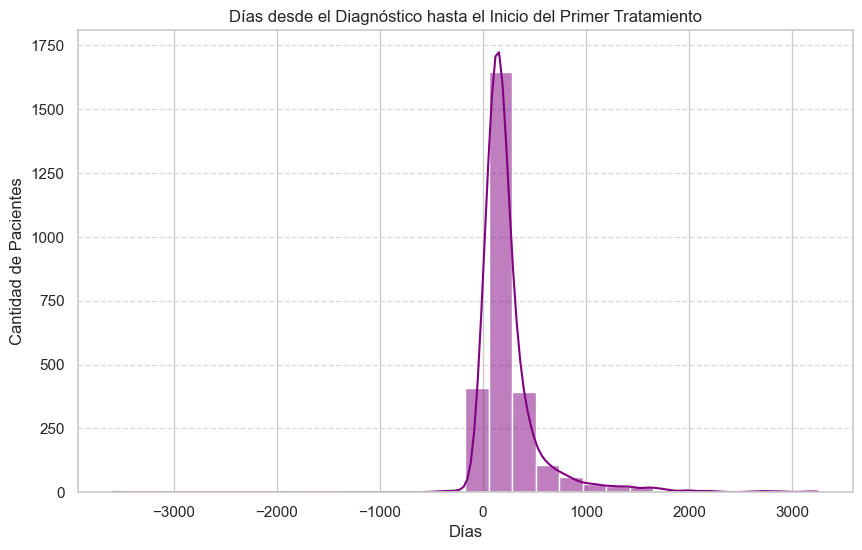

count    2729.000000
mean      251.829608
std       337.609032
min     -3588.000000
25%        98.000000
50%       167.000000
75%       279.000000
max      3247.000000
Name: DIAS_HASTA_INICIO_TRATAMIENTO, dtype: float64

In [30]:
# Cálculo de la diferencia en días entre la fecha de diagnóstico y la fecha de inicio del primer tratamiento
data_cleaned['DIAS_HASTA_INICIO_TRATAMIENTO'] = (data_cleaned['FECHA_INICIO_1'] - data_cleaned['FEC_DIAGNO']).dt.days

# Visualización de la distribución de los días hasta el inicio del tratamiento
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['DIAS_HASTA_INICIO_TRATAMIENTO'].dropna(), kde=True, bins=30, color='purple')
plt.title('Días desde el Diagnóstico hasta el Inicio del Primer Tratamiento')
plt.xlabel('Días')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estadísticas básicas de los días hasta el inicio del tratamiento
data_cleaned['DIAS_HASTA_INICIO_TRATAMIENTO'].describe()


In [31]:
# Filtrar los registros donde la fecha de inicio del tratamiento es anterior a la fecha de diagnóstico
registros_incongruentes = data_cleaned[data_cleaned['FECHA_INICIO_1'] < data_cleaned['FEC_DIAGNO']]

# Ordenar registros_incongruentes por 'DIAS_HASTA_INICIO_TRATAMIENTO' de forma ascendente
registros_incongruentes = registros_incongruentes.sort_values(by='DIAS_HASTA_INICIO_TRATAMIENTO', ascending=True)

# Mostrar los registros encontrados
registros_incongruentes[[ 'FEC_DIAGNO', 'FECHA_INICIO_1', 'DIAS_HASTA_INICIO_TRATAMIENTO']]


,FEC_DIAGNO,FECHA_INICIO_1,DIAS_HASTA_INICIO_TRATAMIENTO
7223,2015-08-15,2005-10-18,-3588
17884,2019-09-15,2018-05-14,-489
3771,2014-01-14,2013-01-03,-376
9578,2016-07-21,2015-07-21,-366
18884,2020-02-10,2019-02-25,-350
...,...,...,...
15029,2018-08-31,2018-08-28,-3
349,2011-06-20,2011-06-17,-3
22554,2021-08-23,2021-08-20,-3
111,2011-02-24,2011-02-21,-3


In [32]:
# Filtrar el DataFrame para mantener solo las filas donde 'FECHA_INICIO_TRATAMIENTO_1' <= 'FEC_DIAGNO'
data_cleaned = data_cleaned[data_cleaned['FECHA_INICIO_1'] >= data_cleaned['FEC_DIAGNO']]
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 13 to 23549
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FEC_NACIMIENTO                 2650 non-null   datetime64[ns]
 1   RELIGION1                      2650 non-null   object        
 2   ETNIA                          2650 non-null   object        
 3   ZONA_VIVIENDA                  2650 non-null   object        
 4   COMUNA                         2650 non-null   object        
 5   REGION                         2650 non-null   object        
 6   SSREFERENCIA                   2650 non-null   object        
 7   RECINTO_PROCEDE                2650 non-null   object        
 8   ESTABLE_DESTINO                2650 non-null   object        
 9   ACT_LABORAL                    2650 non-null   object        
 10  ACT_EMPRESA                    2650 non-null   object        
 11  SITUACION_LABORAL   

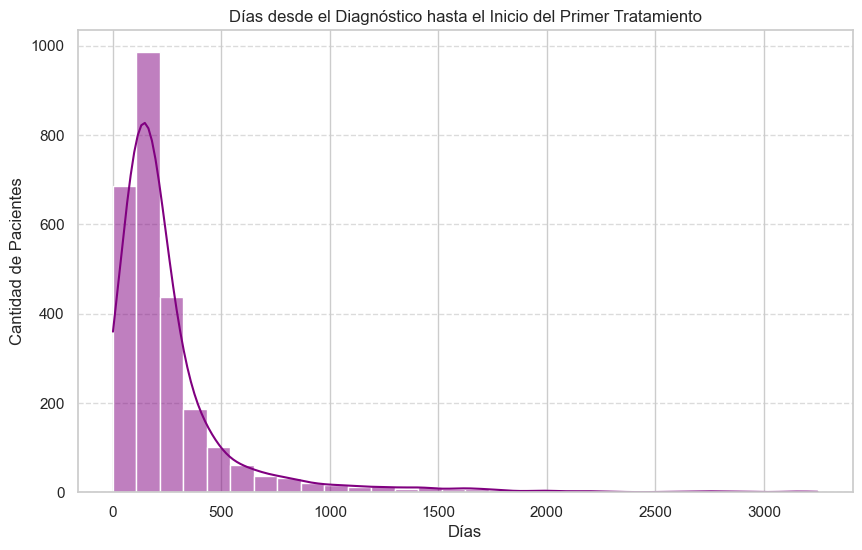

count    2650.000000
mean      262.404906
std       329.552144
min         0.000000
25%       106.000000
50%       171.000000
75%       286.000000
max      3247.000000
Name: DIAS_HASTA_INICIO_TRATAMIENTO, dtype: float64

In [33]:
# Visualización de la distribución de los días hasta el inicio del tratamiento
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['DIAS_HASTA_INICIO_TRATAMIENTO'].dropna(), kde=True, bins=30, color='purple')
plt.title('Días desde el Diagnóstico hasta el Inicio del Primer Tratamiento')
plt.xlabel('Días')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estadísticas básicas de los días hasta el inicio del tratamiento
data_cleaned['DIAS_HASTA_INICIO_TRATAMIENTO'].describe()

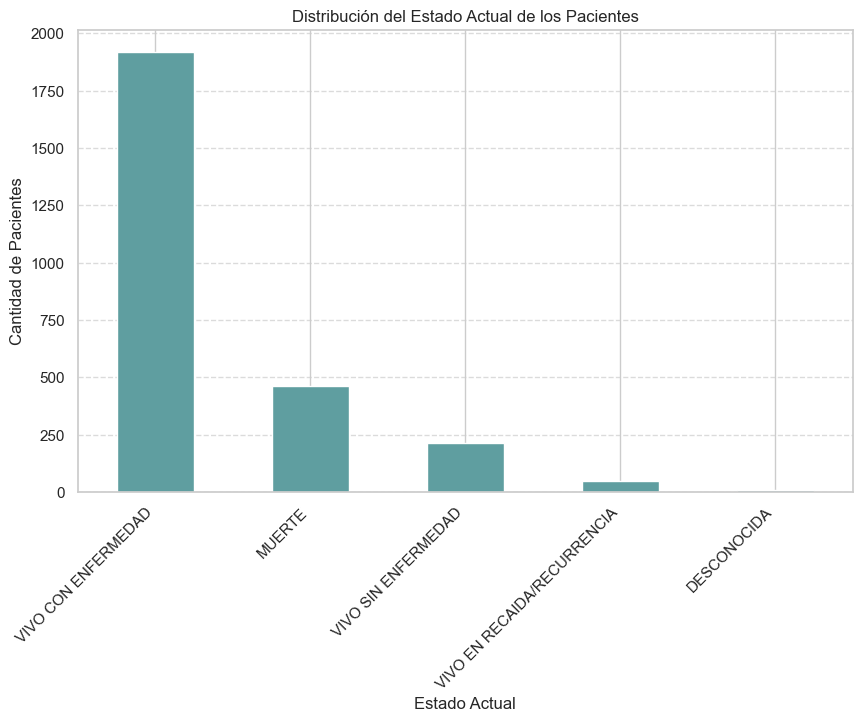

In [34]:
# Análisis del Estado Actual de los pacientes
estado_actual = data_cleaned['ESTADO_ACTUAL'].value_counts()

# Visualización del Estado Actual
plt.figure(figsize=(10, 6))
estado_actual.plot(kind='bar', color='cadetblue')
plt.title('Distribución del Estado Actual de los Pacientes')
plt.xlabel('Estado Actual')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [35]:
df['ESTADO_ACTUAL'].value_counts()

ESTADO_ACTUAL
VIVO CON ENFERMEDAD            2168
MUERTE                          592
VIVO SIN ENFERMEDAD             282
VIVO EN RECAIDA/RECURRENCIA      53
DESCONOCIDA                       7
Name: count, dtype: int64

In [36]:

# Definir los estados para los cuales 'SOBREVIVE' será 1
estados_sobrevive = ['VIVO CON ENFERMEDAD', 'VIVO SIN ENFERMEDAD', 'VIVO EN RECAIDA/RECURRENCIA']

# Crear la columna 'SOBREVIVE' basada en la condición dada
data_cleaned.loc[:, 'SOBREVIVE'] = data_cleaned['ESTADO_ACTUAL'].apply(lambda x: 1 if x in estados_sobrevive else 0 if x == 'MUERTE' else np.nan)

# Verificar los primeros registros para confirmar la creación y asignación correcta en la nueva columna
print(data_cleaned[['ESTADO_ACTUAL', 'SOBREVIVE']].head())

# Eliminar filas con valores NaN en la columna 'SOBREVIVE'
data_cleaned = data_cleaned.dropna(subset=['SOBREVIVE'])

# Eliminar la columna de edad en días si no es necesaria
data_cleaned = data_cleaned.drop(columns=['ESTADO_ACTUAL','Year_Diagno'])

          ESTADO_ACTUAL  SOBREVIVE
13               MUERTE        0.0
20               MUERTE        0.0
62  VIVO CON ENFERMEDAD        1.0
66               MUERTE        0.0
67               MUERTE        0.0


In [37]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, 13 to 23549
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FEC_NACIMIENTO                 2644 non-null   datetime64[ns]
 1   RELIGION1                      2644 non-null   object        
 2   ETNIA                          2644 non-null   object        
 3   ZONA_VIVIENDA                  2644 non-null   object        
 4   COMUNA                         2644 non-null   object        
 5   REGION                         2644 non-null   object        
 6   SSREFERENCIA                   2644 non-null   object        
 7   RECINTO_PROCEDE                2644 non-null   object        
 8   ESTABLE_DESTINO                2644 non-null   object        
 9   ACT_LABORAL                    2644 non-null   object        
 10  ACT_EMPRESA                    2644 non-null   object        
 11  SITUACION_LABORAL   

In [38]:
# Rellenar valores faltantes en variables categóricas con 'Desconocido'
categorical_columns = ['TIPO_TERAPIA_2', 'TIPO_TRATAMIENTO_2', 
                    'T', 'N', 'M', 'Tipo_Tumor', 'ETAPA_CLINICA', 'SUBTIPO', 'FUENTE_1']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna('Desconocido')

In [39]:
# Calcular nuevamente el porcentaje de valores faltantes en las columnas restantes
missing_data_updated = data_cleaned.isnull().mean() * 100

# Filtrar y mostrar columnas con valores faltantes, ordenados
missing_data_filtered = missing_data_updated[missing_data_updated > 0].sort_values(ascending=False)

print(tabulate(missing_data_filtered.to_frame(), headers=['Columna', 'Porcentaje de valores faltantes'], tablefmt='grid'))


+-----------------+-----------------------------------+
| Columna         |   Porcentaje de valores faltantes |
+=================+===================================+
| FECHA_TERMINO_2 |                        70.121     |
+-----------------+-----------------------------------+
| FECHA_INICIO_2  |                        65.9985    |
+-----------------+-----------------------------------+
| FECHA_COMITE    |                        27.0802    |
+-----------------+-----------------------------------+
| FECHA_TERMINO_1 |                         2.30711   |
+-----------------+-----------------------------------+
| ULTIMO_CONTACTO |                         0.075643  |
+-----------------+-----------------------------------+
| FEC_TOM_MUESTRA |                         0.0378215 |
+-----------------+-----------------------------------+


In [40]:
# Calcular los días transcurridos entre eventos clave
#data_cleaned['DIAS_DESDE_NACIMIENTO_A_DIAGNO'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FEC_NACIMIENTO']).dt.days
#data_cleaned['DIAS_DESDE_INGRESO_A_DIAGNO'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FEC_INGRESO_CASO']).dt.days
#data_cleaned['DIAS_DESDE_DIAGNO_A_COMITE'] = (data_cleaned['FECHA_COMITE'] - data_cleaned['FEC_DIAGNO']).dt.days
#data_cleaned['DIAS_DESDE_TOM_MUESTRA_A_DIAGNO'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FEC_TOM_MUESTRA']).dt.days
#data_cleaned['DIAS_DESDE_DIAGNO_TRATAMIENTO_2'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FECHA_INICIO_2']).dt.days
#data_cleaned['DIAS_DESDE_TRATAMIENTO_1_A_TRATAMIENTO_2'] = (data_cleaned['FECHA_INICIO_2'] - data_cleaned['FECHA_TERMINO_1']).dt.days
#data_cleaned['DIAS_TRATAMIENTO_1'] = (data_cleaned['FECHA_TERMINO_1'] - data_cleaned['FECHA_INICIO_1']).dt.days
#data_cleaned['DIAS_TRATAMIENTO_2'] = (data_cleaned['FECHA_TERMINO_2'] - data_cleaned['FECHA_INICIO_2']).dt.days


In [41]:
# Calcular los días transcurridos entre eventos clave
data_cleaned['DIAS_DESDE_NACIMIENTO_A_DIAGNO'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FEC_NACIMIENTO']).dt.days
data_cleaned['DIAS_DESDE_NACIMIENTO_A_INGRESO'] = (data_cleaned['FEC_INGRESO_CASO'] - data_cleaned['FEC_NACIMIENTO']).dt.days
data_cleaned['DIAS_DESDE_NACIMIENTO_A_COMITE'] = (data_cleaned['FECHA_COMITE'] - data_cleaned['FEC_NACIMIENTO']).dt.days
data_cleaned['DIAS_DESDE_NACIMIENTO_TOM_MUESTRA'] = (data_cleaned['FEC_TOM_MUESTRA'] - data_cleaned['FEC_NACIMIENTO']).dt.days
data_cleaned['DIAS_DESDE_NACIMIENTO_TRATAMIENTO_1_INICIO'] = (data_cleaned['FECHA_INICIO_1'] - data_cleaned['FEC_NACIMIENTO']).dt.days
data_cleaned['DIAS_DESDE_NACIMIENTO_TRATAMIENTO_1_FIN'] = (data_cleaned['FECHA_TERMINO_1'] - data_cleaned['FEC_NACIMIENTO']).dt.days
#data_cleaned['DIAS_DESDE_NACIMIENTO_TRATAMIENTO_2'] = (data_cleaned['FECHA_INICIO_2'] - data_cleaned['FEC_NACIMIENTO']).dt.days
#data_cleaned['DIAS_DESDE_TRATAMIENTO_1_A_TRATAMIENTO_2'] = (data_cleaned['FECHA_INICIO_2'] - data_cleaned['FECHA_TERMINO_1']).dt.days
#data_cleaned['DIAS_TRATAMIENTO_1'] = (data_cleaned['FECHA_TERMINO_1'] - data_cleaned['FECHA_INICIO_1']).dt.days
#data_cleaned['DIAS_TRATAMIENTO_2'] = (data_cleaned['FECHA_TERMINO_2'] - data_cleaned['FECHA_INICIO_2']).dt.days
# Elimnar valores negativos de DIAS_TRATAMIENTO_2
#data_cleaned = data_cleaned[data_cleaned['DIAS_TRATAMIENTO_2'] >= 0]

In [42]:
# Calcular la edad en días
data_cleaned['EDAD_EN_DIAS'] = (data_cleaned['FEC_DIAGNO'] - data_cleaned['FEC_NACIMIENTO']).dt.days

# Calcular la edad en años
data_cleaned['EDAD'] = data_cleaned['EDAD_EN_DIAS'] / 365.25

# Eliminar la columna de edad en días si no es necesaria
data_cleaned = data_cleaned.drop(columns=['EDAD_EN_DIAS'])

In [43]:
date_columns = ['FEC_NACIMIENTO', 'FECHA_COMITE', 'FEC_INGRESO_CASO', 'FEC_DIAGNO', 'FEC_TOM_MUESTRA', 
                'FECHA_INICIO_1', 'FECHA_TERMINO_1', 'FECHA_INICIO_2', 'FECHA_TERMINO_2', 'ULTIMO_CONTACTO']

# Eliminar columnas de fechas originales si ya no son necesarias
data_cleaned = data_cleaned.drop(columns=date_columns)



### Imputar columnas numericas con la mediana

In [44]:
from sklearn.impute import KNNImputer

num_columns = data_cleaned.select_dtypes(include=['number']).columns
# Imputar cada columna con la mediana
for column in num_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())


# Mostrar el DataFrame después de la imputación
#print(df)

In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, 13 to 23549
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RELIGION1                                   2644 non-null   object 
 1   ETNIA                                       2644 non-null   object 
 2   ZONA_VIVIENDA                               2644 non-null   object 
 3   COMUNA                                      2644 non-null   object 
 4   REGION                                      2644 non-null   object 
 5   SSREFERENCIA                                2644 non-null   object 
 6   RECINTO_PROCEDE                             2644 non-null   object 
 7   ESTABLE_DESTINO                             2644 non-null   object 
 8   ACT_LABORAL                                 2644 non-null   object 
 9   ACT_EMPRESA                                 2644 non-null   object 
 10  SITUACION_LABOR

In [46]:
  # Guardar el DataFrame procesado
data_cleaned.to_csv('../data/processed/df_cancer_prostata_processed.csv', index=False, encoding='utf-8')

In [47]:
print(tabulate(data_cleaned.head(10), headers='keys', tablefmt='grid'))

+-----+-------------+----------------------+-----------------+-------------+------------------------+----------------+------------------------------------------------+------------------------------------------------+-------------------------------+-----------------+---------------------+------------------------------+-------------------+-------------------+----------------+-----------------------+----------------+-----------------------+----------------+-----------------------+--------------+-----------------+-----------------+---------------------+---------------------+-------------+----------------------------+----------------------+-----------------+-------------------+----------------------------+------------------------------+----------+----------------+----------------+-----------------+-----------+---------------------+----------------------------------------------+--------------+-------------+-------------------+-----------------------+---------+------------------+-------------